In [4]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta
from data_analysis.utils import user
from data.paths.parquet_paths import USER, REVIEW

In [5]:
user_df = pd.read_parquet(str(USER))
review_df = pd.read_parquet(str(REVIEW))

In [6]:
user_df = user.prepare_user_df(user_df)

In [7]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   user_id             10000 non-null  object        
 1   name                10000 non-null  object        
 2   review_count        10000 non-null  int32         
 3   yelping_since       10000 non-null  datetime64[ns]
 4   friends             10000 non-null  object        
 5   useful              10000 non-null  int32         
 6   funny               10000 non-null  int32         
 7   cool                10000 non-null  int32         
 8   fans                10000 non-null  int32         
 9   elite               0 non-null      object        
 10  average_stars       10000 non-null  float32       
 11  compliment_hot      10000 non-null  int32         
 12  compliment_more     10000 non-null  int32         
 13  compliment_profile  10000 non-null  int32      

In [8]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   review_id    100000 non-null  object 
 1   user_id      100000 non-null  object 
 2   business_id  100000 non-null  object 
 3   stars        100000 non-null  float32
 4   date         100000 non-null  object 
 5   text         100000 non-null  object 
 6   useful       100000 non-null  int32  
 7   funny        100000 non-null  int32  
 8   cool         100000 non-null  int32  
dtypes: float32(1), int32(3), object(5)
memory usage: 5.3+ MB


In [9]:
# user_df['user_id'] = user_df['user_id'].astype(str)
# review_df['user_id'] = review_df['user_id'].astype(str)

user_columns = [
    'user_id',
    'name',
    'review_count',
    'yelping_since',
    # 'useful',
    # 'funny',
    # 'cool',
    'fans',
    'average_stars'
]


review_user_df = review_df.join(user_df[user_columns].set_index('user_id'), on='user_id')
review_user_df['date'] = pd.to_datetime(review_user_df['date'])

In [10]:
review_user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   review_id      100000 non-null  object        
 1   user_id        100000 non-null  object        
 2   business_id    100000 non-null  object        
 3   stars          100000 non-null  float32       
 4   date           100000 non-null  datetime64[ns]
 5   text           100000 non-null  object        
 6   useful         100000 non-null  int32         
 7   funny          100000 non-null  int32         
 8   cool           100000 non-null  int32         
 9   name           8279 non-null    object        
 10  review_count   8279 non-null    float64       
 11  yelping_since  8279 non-null    datetime64[ns]
 12  fans           8279 non-null    float64       
 13  average_stars  8279 non-null    float32       
dtypes: datetime64[ns](2), float32(2), float64(2), int32(3

In [11]:
review_user_df = review_user_df.loc[~review_user_df['name'].isna()].copy()

In [12]:
review_user_df.sample(2)

,review_id,user_id,business_id,stars,date,text,useful,funny,cool,name,review_count,yelping_since,fans,average_stars
88848,UpiRkl0TnCY4Ays07y5KBQ,fEt1yBaJ3oQp-JOy6ku_rw,ZCzey5aPhd7jYIoHsUfjmQ,4.0,2015-06-21,One of my favorite places in Phoenix. I like h...,0,0,0,Lan,20.0,2010-07-10 10:38:07,0.0,3.60
27839,VHqE8iXPTCqI5InPPml1BA,hv_M1Kf1EPWDBB1bgnzu6Q,K1ekU1q26tNrImHrt3rr2A,3.0,2011-10-30,I took my son to see Puss in Boots yesterday f...,3,3,2,Alana,112.0,2011-07-24 19:24:39,24.0,3.45


<AxesSubplot: >

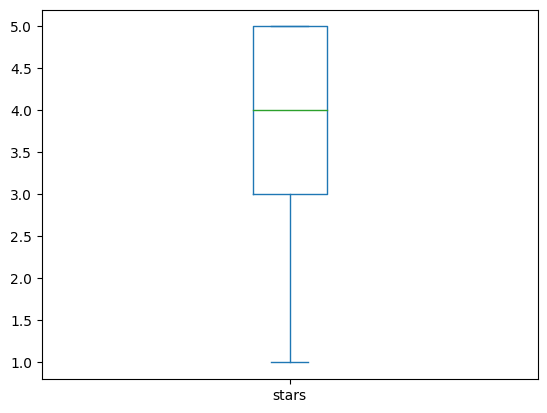

In [13]:
review_user_df.groupby('user_id')['stars'].mean().plot(kind='box')

In [14]:
# early reviews: within month or two after yelping since
youth_threshold = timedelta(days=60)
early_reviews = review_user_df[review_user_df.date - review_user_df.yelping_since < youth_threshold]

early_reviews[['date', 'yelping_since', 'stars', 'user_id']].sample(10)

early_reviews = early_reviews.groupby('user_id').agg(list)
early_reviews.reset_index(inplace=True)
early_reviews['count'] = early_reviews['name'].apply(lambda x: len(x))
early_reviews[early_reviews['count'] >= 3].sample(3)

,user_id,review_id,business_id,stars,date,text,useful,funny,cool,name,review_count,yelping_since,fans,average_stars,count
2,-InhDRRVG7wrwsgAUvN4Qw,"[e01icWqdDPYl7vxl_qZaRA, qF4JC72o_Q3tzWXv-4w4S...","[jMEGdDfVSSubmFZhFnUfrg, i44uHKmr9kfoTfNOJrKht...","[4.0, 3.0, 5.0]","[2009-10-16 00:00:00, 2009-10-15 00:00:00, 200...","[If you have a huge group of people, want to t...","[3, 2, 7]","[0, 0, 0]","[1, 0, 1]","[dinah, dinah, dinah]","[797.0, 797.0, 797.0]","[2009-09-26 00:07:17, 2009-09-26 00:07:17, 200...","[69.0, 69.0, 69.0]","[3.8399999141693115, 3.8399999141693115, 3.839...",3
272,TQXtrSpsUyvHMriX8hvNWQ,"[09x5jSdqrQaoVUN8ZEZkOA, onsJVIqA3CR3VUDOmup2r...","[osSwv6CJy5hDKQdOKeyTow, N_sYl9Uzshx1PG6_I0H9W...","[4.0, 4.0, 3.0]","[2006-11-05 00:00:00, 2006-11-21 00:00:00, 200...",[As a young sushi eater i fell in love with Ru...,"[2, 3, 3]","[0, 0, 1]","[0, 0, 0]","[Erin, Erin, Erin]","[144.0, 144.0, 144.0]","[2006-11-02 23:44:25, 2006-11-02 23:44:25, 200...","[23.0, 23.0, 23.0]","[3.809999942779541, 3.809999942779541, 3.80999...",3
548,y0ZU1w6YY4W-KtMeRXSYLg,"[cOSiHbITZhs5amHm7Y8JXg, xuKBj9Oq-WEkkZn2nISj0...","[lCjPw8i-bCAd8_W3yzQa8Q, hcVHqcbLqk6QQjITVQ7RT...","[5.0, 3.0, 4.0, 4.0, 4.0, 3.0, 3.0, 4.0]","[2008-12-04 00:00:00, 2008-12-12 00:00:00, 200...",[Fresh! Natural! Organic! And........cheap? Sa...,"[6, 2, 4, 4, 5, 2, 1, 1]","[1, 0, 4, 2, 0, 0, 1, 1]","[4, 1, 3, 3, 2, 1, 0, 0]","[Kim, Kim, Kim, Kim, Kim, Kim, Kim, Kim]","[231.0, 231.0, 231.0, 231.0, 231.0, 231.0, 231...","[2008-10-31 14:56:58, 2008-10-31 14:56:58, 200...","[10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0]","[3.5799999237060547, 3.5799999237060547, 3.579...",8


In [15]:
review_bursts = review_user_df.groupby(['user_id', 'date']).agg(list)
review_bursts.reset_index(inplace=True)
review_bursts['count'] = review_bursts['name'].apply(lambda x: len(x))
review_bursts[review_bursts['count'] >= 3].sample(3)

,user_id,date,review_id,business_id,stars,text,useful,funny,cool,name,review_count,yelping_since,fans,average_stars,count
4229,XEHZoTDWjw3w-gcQyYIe4g,2009-05-27,"[TJtAtX9wXYQP8TYghiOCew, AOQ1B2HN6dCgPo5RJDruV...","[NAigH4SqnuuQip8lekq7GQ, wcZYX9ydMJSUnH3KnLYqH...","[3.0, 3.0, 4.0]",[I am not a huge sub fan to start with....\n\n...,"[0, 6, 2]","[1, 3, 1]","[0, 4, 1]","[Daren, Daren, Daren]","[624.0, 624.0, 624.0]","[2008-02-15 16:59:17, 2008-02-15 16:59:17, 200...","[113.0, 113.0, 113.0]","[3.9200000762939453, 3.9200000762939453, 3.920...",3
7007,sTcYq6goD1Fa2WS9MSkSvQ,2011-08-27,"[4DAWSTGnfTRGBdEVz1IIqA, ZuC-598iiFN2hIeHsFUG4...","[VoTi4yVhTVyFdmxUpoyUsg, yHBhLawYmIthUPLbUXK5k...","[5.0, 2.0, 3.0]",[Aye Dios Mios! I think I have died and gone ...,"[9, 6, 3]","[7, 1, 1]","[7, 2, 2]","[Sunny, Sunny, Sunny]","[841.0, 841.0, 841.0]","[2007-08-20 16:17:27, 2007-08-20 16:17:27, 200...","[116.0, 116.0, 116.0]","[3.619999885559082, 3.619999885559082, 3.61999...",3
142,06xIElWq6CAvmtk1xHJWNA,2006-01-10,"[G6ouEOD2kn6wQkEg7aaJXQ, ARZAyikvG0qJOT04xTqAA...","[XZbuPXdyA0ZtTu3AzqtQhg, K1ekU1q26tNrImHrt3rr2...","[1.0, 3.0, 3.0, 5.0, 4.0]","[Mesa Grill, is Bobby Flay's restaurant. Like ...","[0, 0, 0, 0, 1]","[2, 1, 0, 0, 0]","[0, 0, 0, 1, 0]","[Andrew, Andrew, Andrew, Andrew, Andrew]","[559.0, 559.0, 559.0, 559.0, 559.0]","[2006-01-09 00:41:14, 2006-01-09 00:41:14, 200...","[44.0, 44.0, 44.0, 44.0, 44.0]","[3.9200000762939453, 3.9200000762939453, 3.920...",5


In [16]:
# ~14 years * ~50 weeks
bins_count = 700
review_user_df['date_bin'] = pd.cut(review_user_df['date'], bins=bins_count, labels=range(bins_count))

review_bursts_binned = review_user_df.groupby(['user_id', 'date_bin']).agg(list)
review_bursts_binned.reset_index(inplace=True)
review_bursts_binned = review_bursts_binned.dropna()
review_bursts_binned['count'] = review_bursts_binned['name'].apply(lambda x: len(x))
review_bursts_binned[review_bursts_binned['count'] >= 3].sample(3)

,user_id,date_bin,review_id,business_id,stars,date,text,useful,funny,cool,name,review_count,yelping_since,fans,average_stars,count
2964006,t2O6rs4fZeY9o6ZY52RyJA,206,"[8BYTaPilg5h-VFzw3IdCAQ, Mne-9zy-EOz_9QArlTWWy...","[pfn4CSTtpjSkN-OeyAafJQ, qcqDjeirxvdgW5kQVkEwS...","[5.0, 2.0, 2.0, 3.0, 2.0]","[2009-03-03 00:00:00, 2009-03-04 00:00:00, 200...",[The overall quality of restaurants on the ove...,"[3, 2, 1, 1, 3]","[1, 0, 0, 0, 1]","[1, 0, 0, 1, 2]","[Payam, Payam, Payam, Payam, Payam]","[458.0, 458.0, 458.0, 458.0, 458.0]","[2008-10-22 22:57:35, 2008-10-22 22:57:35, 200...","[46.0, 46.0, 46.0, 46.0, 46.0]","[3.819999933242798, 3.819999933242798, 3.81999...",5
830949,ExI15M-oXjHcF42-G1xv9w,49,"[pxyLSUHTLNVjY4cc5sLKTw, 8WbQotVCNEJf31WV0hcoR...","[29umLuZ1gHdIDg5BdNSnEg, _G1C1J-syqfRxD0tqTvEu...","[5.0, 5.0, 5.0, 5.0]","[2006-02-19 00:00:00, 2006-02-20 00:00:00, 200...",[Sweat dripping gasping for air about to pass ...,"[7, 2, 1, 7]","[3, 1, 1, 2]","[5, 1, 0, 5]","[sarah, sarah, sarah, sarah]","[422.0, 422.0, 422.0, 422.0]","[2005-11-10 19:04:01, 2005-11-10 19:04:01, 200...","[40.0, 40.0, 40.0, 40.0]","[3.8299999237060547, 3.8299999237060547, 3.829...",4
727478,D9mgcl6MFE3vRKTVadFFdQ,178,"[TLzGusMgBWt0SIasInKG9w, cYloe0aq5f6N5OrL_rmfN...","[u_vPjx925UPEG9DFOAAvFQ, FCP5hYaTtn6dkpmZ_NTvE...","[3.0, 2.0, 4.0]","[2008-08-18 00:00:00, 2008-08-18 00:00:00, 200...",[We got a GO room which was nice but 2 stars o...,"[0, 0, 0]","[0, 0, 1]","[0, 0, 0]","[Britney, Britney, Britney]","[201.0, 201.0, 201.0]","[2008-04-16 17:26:47, 2008-04-16 17:26:47, 200...","[13.0, 13.0, 13.0]","[3.369999885559082, 3.369999885559082, 3.36999...",3


In [17]:
early_reviewers = set(early_reviews['user_id'])
oneday_burst_reviewers = set(review_bursts['user_id'])
oneweek_burst_reviewers = set(review_bursts_binned['user_id'])

print(f'1d / 1w: {len(oneday_burst_reviewers.intersection(oneweek_burst_reviewers))}')
print(f'early / 1w: {len(early_reviewers.intersection(oneweek_burst_reviewers))}')
print(f'early / 1d: {len(early_reviewers.intersection(oneday_burst_reviewers))}')

1d / 1w: 4692
early / 1w: 558
early / 1d: 558


In [19]:
from data.paths.parquet_paths import BUSINESS
from data_analysis.utils import business

business_df = pd.read_parquet(str(BUSINESS))
business_df = business.prepare_business_df(business_df)
business_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, iBof5Tl8vrKISbi82tFEvQ to 9999
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   name                        10000 non-null  object 
 1   address                     10000 non-null  object 
 2   city                        10000 non-null  object 
 3   state                       10000 non-null  object 
 4   postal_code                 10000 non-null  object 
 5   latitude                    10000 non-null  float32
 6   longitude                   10000 non-null  float32
 7   stars                       10000 non-null  float32
 8   review_count                10000 non-null  float64
 9   is_open                     10000 non-null  float64
 10  categories                  10000 non-null  object 
 11  hours                       7716 non-null   object 
 12  AcceptsInsurance            413 non-null    object 
 13  AgesAllowed     

In [25]:
# Searching for home state
# taking users activity
# grouping by user
# checking for the most visted / visited for longest time

review_place_df = review_user_df[['user_id', 'business_id', 'date']]
review_place_df = review_place_df.join(business_df[['city', 'state', 'latitude', 'longitude']], rsuffix='_business', on='business_id')
review_place_df = review_place_df.dropna()
review_place_df

,user_id,business_id,date,city,state,latitude,longitude
3,zEOuNc4K40aw-GE6y8RgIg,Y6FNieFd5UKhJ3a6FbQhyg,2014-07-28,Gilbert,AZ,33.378639,-111.755966
34,fJezNrc49UX9gONGNJ4YUQ,4gwh0q7JsdzHIm_pdYUlZg,2013-02-22,Scottsdale,AZ,33.539532,-111.924576
82,UYcmGbelzRa0Q6JqzLoguw,Er5XAY2UFGGqBHdqpeCFkA,2013-08-04,Las Vegas,NV,36.010628,-115.174904
87,whqfWVBj4x5EDboIVDOymQ,CsLQLiRoafpJPJSkNX2h5Q,2010-03-13,Charlotte,NC,35.194893,-80.767441
93,Y1ICO26IsN7i_1OVD0Inyw,GHs7grPeyVPwmiVKhhfMvg,2008-05-02,Glendale,AZ,33.534256,-112.261200
...,...,...,...,...,...,...,...
99827,Wmh9vK9LX-sxeuTb6vzM2A,36pB0QVVNZuOLV_UxosbAQ,2018-08-27,Montréal,QC,45.479313,-73.584496
99830,U13tLFucJNz1fNv_Xgdj0g,WCqcYtJ4rUxA4bIzjOfzqg,2013-05-11,Charlotte,NC,35.226147,-80.844231
99856,PYRIiQilTl1rkx83hm8ttA,LHXisknIbUy_XtdEQc7x9w,2014-05-13,Las Vegas,NV,36.060051,-115.164833
99892,SBsQvmEEYJsD6xeRzHxf8Q,aRqxT28Tdz2aDiZ7Vkyejw,2013-06-01,Toronto,ON,43.664177,-79.414963


In [98]:
state_mode = (review_place_df
    .groupby(['user_id'])['state']
    .agg(lambda x: pd.Series.mode(x)[0])
    .reset_index()
    .set_index('user_id'))
city_mode = (review_place_df
    .groupby(['user_id'])['city']
    .agg(lambda x: pd.Series.mode(x)[0])
    .reset_index()
    .set_index('user_id'))

user_home_byvisits = state_mode.join(city_mode, on='user_id')
user_home_byvisits.reset_index()

,user_id,state,city
0,---1lKK3aKOuomHnwAkAow,NV,Las Vegas
1,--RlSfc-QmcHFGHyX6aVjA,NV,Las Vegas
2,-1BrzE0pqO_EVw9SGzHEnw,NV,Las Vegas
3,-6J2VjbeLWAHsyAB8VN7bA,AZ,Glendale
4,-6iqrpnSPBW2plS8y7-cLA,NC,Charlotte
...,...,...,...
2750,zwmw_cNa5DzJotaFOHTvQg,AZ,Scottsdale
2751,zx6gq8IslnAwCyCUztXn1A,AZ,Scottsdale
2752,zy2ImADN9B0cvIRCC3d0Zg,AZ,Gilbert
2753,zyNGr5Tlg1rK1frevXCx2g,AZ,Scottsdale


In [99]:
# How to check by time?
# for each pair of reviews from same state/city count deltas between visits, max delta is homestate, homecity
from itertools import combinations

state_delta = review_place_df.groupby(['user_id', 'state']).apply(lambda x:
    sum(map(lambda dates: abs((dates[1] - dates[0]).days), combinations(x['date'], 2))))
    
state_mode_time = (state_delta.groupby(['user_id', 'state'])
    .max()
    .reset_index()[['user_id', 'state']]
    .drop_duplicates(['user_id'])
    .set_index('user_id'))

city_delta = review_place_df.groupby(['user_id', 'city']).apply(lambda x:
    sum(map(lambda dates: abs((dates[1] - dates[0]).days), combinations(x['date'], 2))))
city_mode_time = (city_delta.groupby(['user_id', 'city'])
    .max()
    .reset_index()[['user_id', 'city']]
    .drop_duplicates(['user_id'])
    .set_index('user_id'))

user_home_bydelta = state_mode_time.join(city_mode_time, on='user_id')
user_home_bydelta.reset_index()

,user_id,state,city
0,---1lKK3aKOuomHnwAkAow,NV,Las Vegas
1,--RlSfc-QmcHFGHyX6aVjA,NV,Las Vegas
2,-1BrzE0pqO_EVw9SGzHEnw,NV,Las Vegas
3,-6J2VjbeLWAHsyAB8VN7bA,AZ,Glendale
4,-6iqrpnSPBW2plS8y7-cLA,NC,Charlotte
...,...,...,...
2750,zwmw_cNa5DzJotaFOHTvQg,AZ,Scottsdale
2751,zx6gq8IslnAwCyCUztXn1A,AZ,Scottsdale
2752,zy2ImADN9B0cvIRCC3d0Zg,AZ,Gilbert
2753,zyNGr5Tlg1rK1frevXCx2g,AZ,Scottsdale


In [110]:
user_home_byvisits.compare(user_home_bydelta, keep_shape=True).dropna()

state              city           
                        self other        self      other
user_id                                                  
37HswRimgBEf7_US-c3CDA    NV    NC   Las Vegas  Charlotte
CxDOIDnH8gp9KXzpBHJYXw    ON    OH     Markham  Cleveland
U4INQZOPSUaj8hMjLlZ3KA    NV    AZ   Las Vegas  Henderson
hLVq7VSJBHZwqurwWoCmpg    PA    NV  Pittsburgh  Las Vegas